# **Joining Dataframes**

In [ ]:
import pandas as pd
cust_df = pd.read_csv('/content/olist_customers_dataset.csv')
geo_df = pd.read_csv('/content/olist_geolocation_dataset.csv')
order_df = pd.read_csv('/content/olist_orders_dataset.csv')
order_items_df = pd.read_csv('/content/olist_order_items_dataset.csv')
order_payments_df = pd.read_csv('/content/olist_order_payments_dataset.csv')
order_reviews_df = pd.read_csv('/content/olist_order_reviews_dataset.csv')
products_df = pd.read_csv('/content/olist_products_dataset.csv')
sellers_df = pd.read_csv('/content/olist_sellers_dataset.csv')
name_translation_df = pd.read_csv('/content/product_category_name_translation.csv')

In [ ]:
#translate product names - join product with product name translation
merged_df = pd.merge(products_df, name_translation_df, on='product_category_name', how='outer')

In [ ]:
#join product with order items
merged_df = pd.merge(order_items_df, merged_df, on='product_id', how='left')

In [ ]:
#join with order dataset
merged_df = pd.merge(merged_df, order_df, on='order_id', how='left')

In [ ]:
#join with seller
merged_df = pd.merge(merged_df, sellers_df, on='seller_id', how='left')

In [ ]:
#join with customer dataset
merged_df = pd.merge(merged_df, cust_df, on='customer_id', how='left')

In [ ]:
#join with payments dataset
merged_df = pd.merge(merged_df, order_payments_df, on='order_id', how='left')

In [ ]:
#join with order reviews dataset
merged_df = pd.merge(merged_df, order_reviews_df, on='order_id', how='inner')
merged_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",21/09/2017 00:00,22/09/2017 10:57
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,13/05/2017 00:00,15/05/2017 11:34
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,23/01/2018 00:00,23/01/2018 16:06
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,15/08/2018 00:00,15/08/2018 16:39
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,02/03/2017 00:00,03/03/2017 10:54


In [ ]:
duplicated_rows = merged_df[merged_df.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, product_category_name_english, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, seller_zip_code_prefix, seller_city, seller_state, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, payment_sequential, payment_type, payment_installments, payment_value, review_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp]
Index: []

[0 rows x 40 columns]


In [ ]:
#drop unnecessary columns
merged_df = merged_df.drop(['product_name_lenght', 'product_description_lenght',
                            'shipping_limit_date', 'order_approved_at', 'order_delivered_carrier_date',
                            'customer_id', 'payment_sequential', 'review_id', 'review_comment_title',
                            'review_creation_date','review_answer_timestamp'], axis=1)
merged_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id', 'price',
       'freight_value', 'product_category_name', 'product_photos_qty',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'product_category_name_english', 'order_status',
       'order_purchase_timestamp', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'payment_type', 'payment_installments', 'payment_value', 'review_score',
       'review_comment_message'],
      dtype='object')

In [ ]:
#reorder
merged_df = merged_df[['order_id', 'product_id', 'seller_id', 'customer_unique_id', 'order_item_id', 'product_category_name', 'product_category_name_english',
                       'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_photos_qty', 'seller_zip_code_prefix',
                       'seller_city', 'seller_state', 'customer_city', 'customer_state', 'customer_zip_code_prefix', 'order_status', 'order_purchase_timestamp', 'order_delivered_customer_date',
                       'order_estimated_delivery_date', 'price', 'freight_value', 'payment_value', 'payment_type', 'payment_installments', 'review_score', 'review_comment_message']]
merged_df.head()

,order_id,product_id,seller_id,customer_unique_id,order_item_id,product_category_name,product_category_name_english,product_weight_g,product_length_cm,product_height_cm,...,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,price,freight_value,payment_value,payment_type,payment_installments,review_score,review_comment_message
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,871766c5855e863f6eccc05f988b23cb,1,cool_stuff,cool_stuff,650.0,28.0,9.0,...,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29 00:00:00,58.90,13.29,72.19,credit_card,2.0,5,"Perfeito, produto entregue antes do combinado."
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,eb28e67c4c0b83846050ddfb8a35d051,1,pet_shop,pet_shop,30000.0,50.0,30.0,...,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15 00:00:00,239.90,19.93,259.83,credit_card,3.0,4,NaN
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,3818d81c6709e39d06b2738a8d3a2474,1,moveis_decoracao,furniture_decor,3050.0,33.0,13.0,...,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05 00:00:00,199.00,17.87,216.87,credit_card,5.0,5,Chegou antes do prazo previsto e o produto sur...
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,af861d436cfc08b2c2ddefd0ba074622,1,perfumaria,perfumery,200.0,16.0,10.0,...,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20 00:00:00,12.99,12.79,25.78,credit_card,2.0,4,NaN
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,64b576fb70d441e8f1b2d7d446e483c5,1,ferramentas_jardim,garden_tools,3750.0,35.0,40.0,...,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17 00:00:00,199.90,18.14,218.04,credit_card,3.0,5,Gostei pois veio no prazo determinado .


# **Exploratory Data Analysis**

In [ ]:
#find missing data
missing_data = merged_df.isnull().sum()
print(missing_data)

order_id                             0
product_id                           0
seller_id                            0
customer_unique_id                   0
order_item_id                        0
product_category_name             1528
product_category_name_english     1550
product_weight_g                    20
product_length_cm                   20
product_height_cm                   20
product_width_cm                    20
product_photos_qty                1528
seller_zip_code_prefix               0
seller_city                          0
seller_state                         0
customer_city                        0
customer_state                       0
customer_zip_code_prefix             0
order_status                         0
order_purchase_timestamp             0
order_delivered_customer_date     2275
order_estimated_delivery_date        0
price                                0
freight_value                        0
payment_value                        3
payment_type             

In [ ]:
#missing review
missing_review = merged_df[merged_df['review_score'].isnull()]
missing_review = missing_review[['order_id', 'product_category_name_english', 'order_status', 'review_score']]
missing_review

#next we just drop the missing value

,order_id,product_category_name_english,order_status,review_score


In [ ]:
#missing delivery duration days
missing_delivery = merged_df[merged_df['order_delivered_customer_date'].isnull()]
missing_delivery = missing_delivery[['order_id', 'order_status', 'order_delivered_customer_date', 'review_score']]
missing_delivery

#next we will give -1 to indicate that the product delivered date is unknown

,order_id,order_status,order_delivered_customer_date,review_score
68,002f19a65a2ddd70a090297872e6d64e,shipped,NaN,3
69,002f19a65a2ddd70a090297872e6d64e,shipped,NaN,3
234,00a99c50fdff7e36262caba33821875a,shipped,NaN,5
243,00ae7a8b4936674ebb701d4a23719a79,canceled,NaN,2
397,00ff0cf5583758e6964723e42f111bf4,canceled,NaN,1
...,...,...,...,...
106070,feebdfdb4759bd4600d52547c81b4fa8,shipped,NaN,2
106118,ff0768e3356919b32e3d7f30baecfcfb,shipped,NaN,1
106209,ff358345576214cc9e08488188973c84,shipped,NaN,1
106250,ff536d93ae4214b4d51c2894ccfc569f,shipped,NaN,3


In [ ]:
#missing payments info
missing_payment = merged_df[merged_df['payment_value'].isnull()]
missing_payment = missing_payment[['order_id', 'order_status', 'order_item_id', 'product_category_name_english', 'price', 'freight_value',
                                   'payment_type', 'payment_installments', 'payment_value', 'review_score', 'review_comment_message']]
missing_payment

#next we can drop this row
#the comment said that they did not received the product but the order status is delivered

,order_id,order_status,order_item_id,product_category_name_english,price,freight_value,payment_type,payment_installments,payment_value,review_score,review_comment_message
79808,bfbd0f9bdef84302105ad712db648a6c,delivered,1,health_beauty,44.99,2.83,NaN,NaN,NaN,1,nao recebi o produto e nem resposta da empresa
79809,bfbd0f9bdef84302105ad712db648a6c,delivered,2,health_beauty,44.99,2.83,NaN,NaN,NaN,1,nao recebi o produto e nem resposta da empresa
79810,bfbd0f9bdef84302105ad712db648a6c,delivered,3,health_beauty,44.99,2.83,NaN,NaN,NaN,1,nao recebi o produto e nem resposta da empresa


In [ ]:
#add delivery duration
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])
merged_df['order_delivered_customer_date'] = pd.to_datetime(merged_df['order_delivered_customer_date'])
merged_df['order_estimated_delivery_date'] = pd.to_datetime(merged_df['order_estimated_delivery_date'])

#calculate the estimated & real delivery duration in days, ontime if delivery < estimated
merged_df['delivery_duration_days'] = (merged_df['order_delivered_customer_date'] - merged_df['order_purchase_timestamp']).dt.days
merged_df['estimated_delivery_days'] = (merged_df['order_estimated_delivery_date'] - merged_df['order_purchase_timestamp']).dt.days
merged_df['ontime_delivery'] = merged_df['delivery_duration_days'] <= merged_df['estimated_delivery_days']

In [ ]:
#max and min
stats_df = pd.DataFrame({
    'Feature': ['price', 'delivery_duration_days', 'estimated_delivery_days', 'payment_value'],
    'Max': [merged_df['price'].max(), merged_df['delivery_duration_days'].max(), merged_df['estimated_delivery_days'].max(), merged_df['payment_value'].max()],
    'Min': [merged_df['price'].min(), merged_df['delivery_duration_days'].min(), merged_df['estimated_delivery_days'].min(), merged_df['payment_value'].min()]
})

stats_df

,Feature,Max,Min
0,price,6735.00,0.85
1,delivery_duration_days,209.00,0.00
2,estimated_delivery_days,155.00,2.00
3,payment_value,13664.08,0.00


In [ ]:
#lowest price
price_df = merged_df.sort_values('price', ascending=True)
print(price_df[['order_id', 'order_item_id', 'product_category_name_english', 'price']].head(10))

                               order_id  order_item_id  \
26201  3ee6513ae7ea23bdfab5b9ab60bffcb5              1   
82286  c5bdd8ef3c0ec420232e668302179113              2   
54274  8272b63d03f5f79c56e9e4120aec44ef             13   
54281  8272b63d03f5f79c56e9e4120aec44ef             20   
54263  8272b63d03f5f79c56e9e4120aec44ef              2   
54275  8272b63d03f5f79c56e9e4120aec44ef             14   
54279  8272b63d03f5f79c56e9e4120aec44ef             18   
54278  8272b63d03f5f79c56e9e4120aec44ef             17   
54264  8272b63d03f5f79c56e9e4120aec44ef              3   
54265  8272b63d03f5f79c56e9e4120aec44ef              4   

         product_category_name_english  price  
26201  construction_tools_construction   0.85  
82286  construction_tools_construction   0.85  
54274                    health_beauty   1.20  
54281                    health_beauty   1.20  
54263                    health_beauty   1.20  
54275                    health_beauty   1.20  
54279                    

In [ ]:
#highest delivery duration days
sorted_df = merged_df.sort_values('delivery_duration_days', ascending=False)
print(sorted_df[['order_id', 'order_status', 'order_purchase_timestamp', 'order_delivered_customer_date',
                 'delivery_duration_days', 'estimated_delivery_days']].head(10))

                               order_id order_status order_purchase_timestamp  \
84040  ca07593549f1816d26a572e06dc1eab6    delivered      2017-02-21 23:31:27   
11328  1b3190b2dfa9d789e1f14c05b647a14a    delivered      2018-02-23 14:57:35   
28365  440d0d17af552815d15a9e41abe49359    delivered      2017-03-07 23:59:51   
16665  285ab9426d6982034523a855f55a885e    delivered      2017-03-08 22:47:40   
6371   0f4519c5f1c541ddec9f21b3bddd533a    delivered      2017-03-09 13:26:57   
19725  2fb597c2f772eca01b1f5c561bf6cc7b    delivered      2017-03-08 18:09:02   
29993  47b40429ed8cce3aee9199792275433f    delivered      2018-01-03 09:44:01   
19806  2fe324febf907e3ea3f2aa9650869fa5    delivered      2017-03-13 20:17:10   
18746  2d7561026d542c8dbd8f0daeadf67a43    delivered      2017-03-15 11:24:27   
28099  437222e3fd1b07396f1d9ba8c15fba59    delivered      2017-03-16 11:36:00   

      order_delivered_customer_date  delivery_duration_days  \
84040           2017-09-19 14:36:39          

In [ ]:
#highest estimated delivery days
sortedestimated_df = merged_df.sort_values('estimated_delivery_days', ascending=False)
print(sortedestimated_df[['order_id', 'order_status', 'delivery_duration_days', 'estimated_delivery_days',
                 'customer_city', 'customer_state', 'seller_city', 'seller_state']].head(10))

                               order_id order_status  delivery_duration_days  \
99320  eec7f369423b033e549c02f3c5381205    delivered                    20.0   
2484   0607f0efea4b566f1eb8f7d3c2397320    delivered                     3.0   
2483   0607f0efea4b566f1eb8f7d3c2397320    delivered                     3.0   
82910  c72727d29cde4cf870d569bf65edabfd    delivered                     6.0   
44125  69d126e78947276280838ee9361f5505   processing                     NaN   
8141   13bdf405f961a6deec817d817f5c6624     canceled                     NaN   
64840  9c94a4ea2f7876660fa6f1b59b69c8e6      shipped                     NaN   
81055  c2bb89b5c1dd978d507284be78a04cb2    delivered                    16.0   
81056  c2bb89b5c1dd978d507284be78a04cb2    delivered                    16.0   
27002  40dc2ba6f322a17626aac6244332828c    delivered                     7.0   

       estimated_delivery_days          customer_city customer_state  \
99320                      155            sao g

In [ ]:
#highest payment value
payment_df = merged_df.sort_values('payment_value', ascending=False)
print(payment_df[['order_id', 'order_status', 'order_item_id', 'product_category_name_english', 'price', 'freight_value',
                  'payment_type', 'payment_installments', 'payment_value']].head(10))

                               order_id order_status  order_item_id  \
1514   03caa2c082116e1d31e67e9ae3700499    delivered              1   
1520   03caa2c082116e1d31e67e9ae3700499    delivered              7   
1516   03caa2c082116e1d31e67e9ae3700499    delivered              3   
1517   03caa2c082116e1d31e67e9ae3700499    delivered              4   
1515   03caa2c082116e1d31e67e9ae3700499    delivered              2   
1518   03caa2c082116e1d31e67e9ae3700499    delivered              5   
1519   03caa2c082116e1d31e67e9ae3700499    delivered              6   
1521   03caa2c082116e1d31e67e9ae3700499    delivered              8   
48100  736e1922ae60d0d6a89247b851902527    delivered              4   
48099  736e1922ae60d0d6a89247b851902527    delivered              3   

      product_category_name_english   price  freight_value payment_type  \
1514                fixed_telephony  1680.0          28.01  credit_card   
1520                fixed_telephony  1680.0          28.01  credit_c

In [ ]:
#average review score for duration of delivery
average_review_by_duration = merged_df.groupby('delivery_duration_days')['review_score'].mean()
average_review_by_duration

,review_score
delivery_duration_days,
0.0,3.388889
1.0,4.418278
2.0,4.382910
3.0,4.370397
4.0,4.321415
...,...
191.0,1.000000
194.0,3.000000
195.0,1.000000


In [ ]:
#average review score for on-time and late deliveries
average_review_score_ontime = merged_df[merged_df['ontime_delivery'] == True]['review_score'].mean()
average_review_score_late = merged_df[merged_df['ontime_delivery'] == False]['review_score'].mean()

print(f"Average review score for on-time deliveries: {average_review_score_ontime:.2f}")
print(f"Average review score for late deliveries: {average_review_score_late:.2f}")

Average review score for on-time deliveries: 4.19
Average review score for late deliveries: 2.28


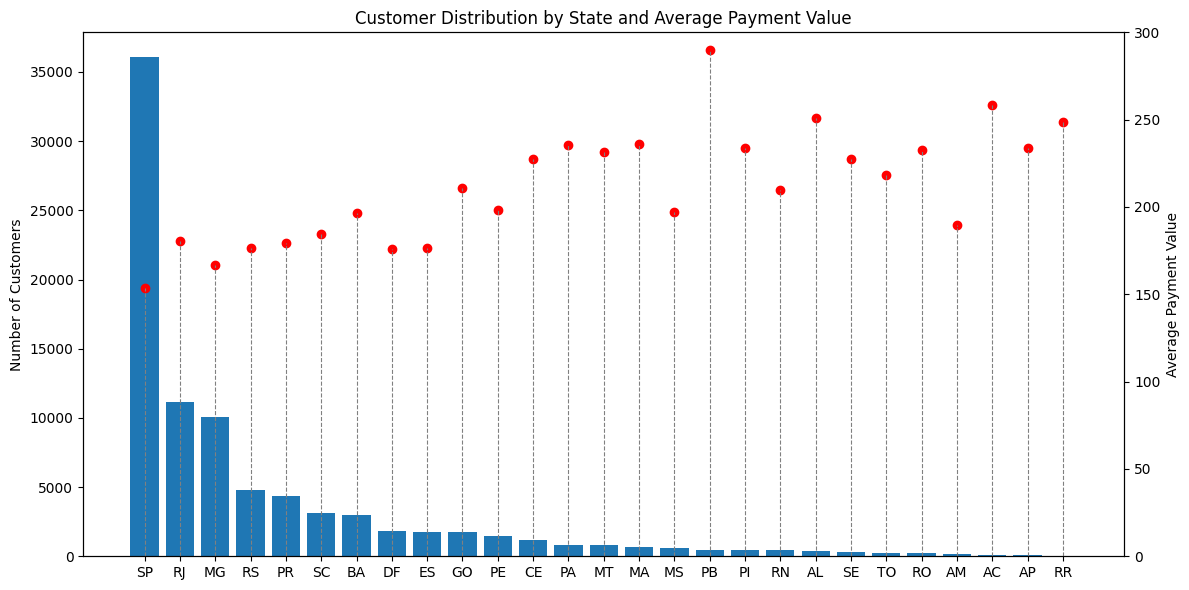

In [ ]:
import matplotlib.pyplot as plt

#number of customers in each state
customer_distribution = merged_df.groupby('customer_state')['customer_unique_id'].nunique().sort_values(ascending=False)
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(customer_distribution.index, customer_distribution.values)
ax1.set_ylabel('Number of Customers')
ax1.tick_params(axis='y')

#average payment value in each state
state_avg_payment = merged_df.groupby('customer_state')['payment_value'].mean()
ax2 = ax1.twinx()
ax2.plot(state_avg_payment.index, state_avg_payment.values, 'o', color='red', linestyle='None')
ax2.vlines(x=state_avg_payment.index, ymin=0, ymax=state_avg_payment.values, colors='gray', linestyles='dashed', linewidth=0.8)
ax2.set_ylabel('Average Payment Value')
ax2.set_ylim(0, 300)
ax2.tick_params(axis='y')

plt.title('Customer Distribution by State and Average Payment Value')
plt.xlabel('Customer State')

plt.tight_layout()
plt.show()

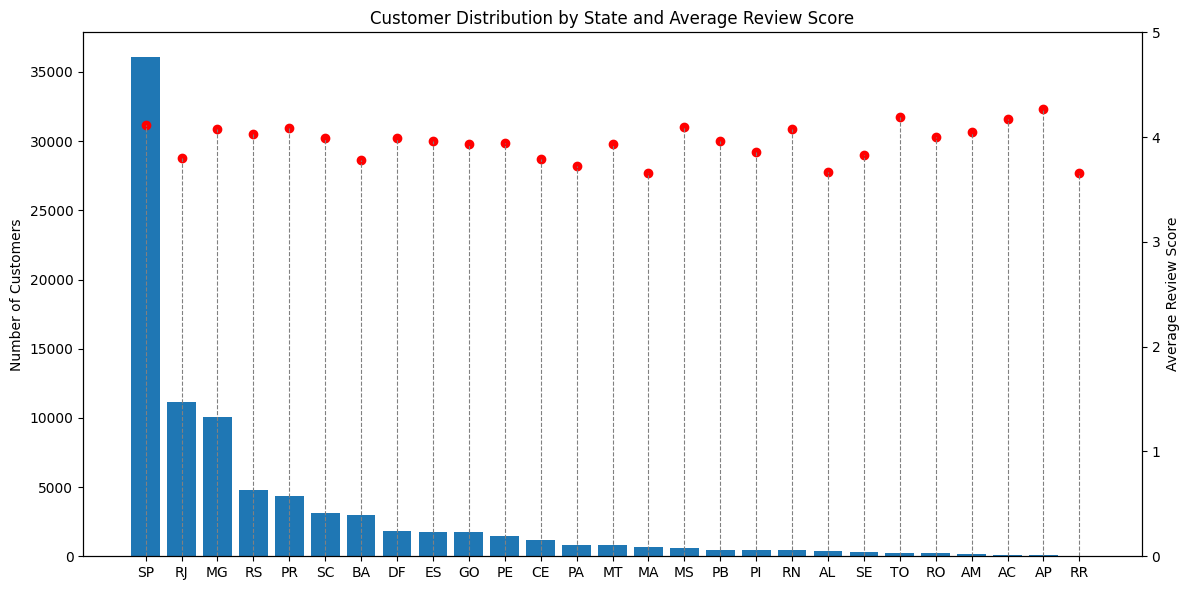

In [ ]:
# Customer Distribution by State and Average Review Score per state
customer_review_distribution = merged_df.groupby('customer_state')['review_score'].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(customer_distribution.index, customer_distribution.values)
ax1.set_ylabel('Number of Customers')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(customer_review_distribution.index, customer_review_distribution.values, 'o', color='red', linestyle='None')
ax2.vlines(x=customer_review_distribution.index, ymin=0, ymax=customer_review_distribution.values, colors='gray', linestyles='dashed', linewidth=0.8)
ax2.set_ylabel('Average Review Score')
ax2.set_ylim(0, 5)
ax2.tick_params(axis='y')

plt.title('Customer Distribution by State and Average Review Score')
plt.xlabel('Customer State')

plt.tight_layout()
plt.show()

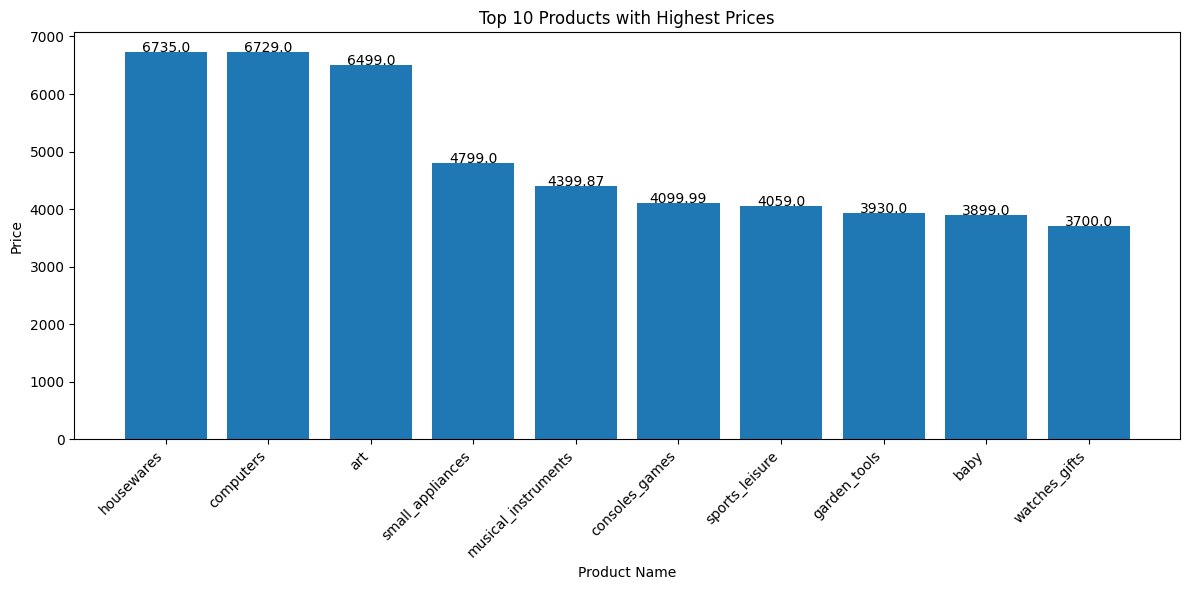

In [ ]:
#top 10 products with the highest prices
top_10_products = merged_df.groupby('product_category_name_english')['price'].max().nlargest(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_products.index, top_10_products.values)
plt.xlabel("Product Name")
plt.ylabel("Price")
plt.title("Top 10 Products with Highest Prices")
plt.xticks(rotation=45, ha="right")

# Add the number above the chart
for i, v in enumerate(top_10_products.values):
  plt.text(i, v + 1, str(v), ha='center')

plt.tight_layout()
plt.show()

# **Feature Engineering I**
Adding relevant columns, dealing with missing values, checking duplicates

In [ ]:
#add broader product category

In [ ]:
#add product dimension = length*height*width
merged_df['product_dimension_cm3'] = merged_df['product_length_cm'] * merged_df['product_height_cm'] * merged_df['product_width_cm']

In [ ]:
#add a column indicating if there's a comment
merged_df['has_comment'] = ~merged_df['review_comment_message'].isnull()
merged_df.head()

,order_id,product_id,seller_id,customer_unique_id,order_item_id,product_category_name,product_category_name_english,product_weight_g,product_length_cm,product_height_cm,...,payment_value,payment_type,payment_installments,review_score,review_comment_message,delivery_duration_days,estimated_delivery_days,ontime_delivery,product_dimension_cm3,has_comment
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,871766c5855e863f6eccc05f988b23cb,1,cool_stuff,cool_stuff,650.0,28.0,9.0,...,72.19,credit_card,2.0,5,"Perfeito, produto entregue antes do combinado.",7.0,15,True,3528.0,True
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,eb28e67c4c0b83846050ddfb8a35d051,1,pet_shop,pet_shop,30000.0,50.0,30.0,...,259.83,credit_card,3.0,4,NaN,16.0,18,True,60000.0,False
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,3818d81c6709e39d06b2738a8d3a2474,1,moveis_decoracao,furniture_decor,3050.0,33.0,13.0,...,216.87,credit_card,5.0,5,Chegou antes do prazo previsto e o produto sur...,7.0,21,True,14157.0,True
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,af861d436cfc08b2c2ddefd0ba074622,1,perfumaria,perfumery,200.0,16.0,10.0,...,25.78,credit_card,2.0,4,NaN,6.0,11,True,2400.0,False
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,64b576fb70d441e8f1b2d7d446e483c5,1,ferramentas_jardim,garden_tools,3750.0,35.0,40.0,...,218.04,credit_card,3.0,5,Gostei pois veio no prazo determinado .,25.0,40,True,42000.0,True


In [ ]:
#add quantity column based on order items id
merged_df['quantity'] = merged_df.groupby('order_id')['order_item_id'].transform('max')
merged_df = merged_df.drop_duplicates(subset='order_id', keep='first')

#check the highest
qty_df = merged_df.sort_values('quantity', ascending=False)
print(qty_df[['order_id', 'order_status', 'quantity',
              'product_category_name_english', 'price', 'freight_value',
              'payment_type', 'payment_installments', 'payment_value']].head(5))

                               order_id order_status  quantity  \
54262  8272b63d03f5f79c56e9e4120aec44ef    delivered        21   
71045  ab14fdcfbe524636d65ee38360e22ce8    delivered        20   
11258  1b15974a0141d54e36626dca3fdc731a    delivered        20   
27738  428a2f660dc84138d969ccd69a0ab6d5    delivered        15   
64512  9bdc4d4c71aa1de4606060929dee888c    delivered        14   

      product_category_name_english   price  freight_value payment_type  \
54262                 health_beauty    1.20           7.89  credit_card   
71045                          auto   98.70          14.44  credit_card   
11258         computers_accessories  100.00          10.12       boleto   
27738               furniture_decor   65.49          16.22  credit_card   
64512                     telephony   29.99           7.78  credit_card   

       payment_installments  payment_value  
54262                   2.0         196.11  
71045                   4.0        2262.80  
11258            

In [ ]:
#add column total sales = quantity x price
merged_df['total_sales'] = merged_df['quantity'] * merged_df['price']
merged_df.head()

,order_id,product_id,seller_id,customer_unique_id,order_item_id,product_category_name,product_category_name_english,product_weight_g,product_length_cm,product_height_cm,...,payment_installments,review_score,review_comment_message,delivery_duration_days,estimated_delivery_days,ontime_delivery,product_dimension_cm3,has_comment,quantity,total_sales
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,871766c5855e863f6eccc05f988b23cb,1,cool_stuff,cool_stuff,650.0,28.0,9.0,...,2.0,5,"Perfeito, produto entregue antes do combinado.",7.0,15,True,3528.0,True,1,58.90
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,eb28e67c4c0b83846050ddfb8a35d051,1,pet_shop,pet_shop,30000.0,50.0,30.0,...,3.0,4,NaN,16.0,18,True,60000.0,False,1,239.90
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,3818d81c6709e39d06b2738a8d3a2474,1,moveis_decoracao,furniture_decor,3050.0,33.0,13.0,...,5.0,5,Chegou antes do prazo previsto e o produto sur...,7.0,21,True,14157.0,True,1,199.00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,af861d436cfc08b2c2ddefd0ba074622,1,perfumaria,perfumery,200.0,16.0,10.0,...,2.0,4,NaN,6.0,11,True,2400.0,False,1,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,64b576fb70d441e8f1b2d7d446e483c5,1,ferramentas_jardim,garden_tools,3750.0,35.0,40.0,...,3.0,5,Gostei pois veio no prazo determinado .,25.0,40,True,42000.0,True,1,199.90


In [ ]:
#add column 'same_city' indicating if seller and customer are in the same city
merged_df['same_city'] = (merged_df['seller_zip_code_prefix'] == merged_df['customer_zip_code_prefix'])
merged_df.head()

,order_id,product_id,seller_id,customer_unique_id,order_item_id,product_category_name,product_category_name_english,product_weight_g,product_length_cm,product_height_cm,...,review_score,review_comment_message,delivery_duration_days,estimated_delivery_days,ontime_delivery,product_dimension_cm3,has_comment,quantity,total_sales,same_city
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,871766c5855e863f6eccc05f988b23cb,1,cool_stuff,cool_stuff,650.0,28.0,9.0,...,5,"Perfeito, produto entregue antes do combinado.",7.0,15,True,3528.0,True,1,58.90,False
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,eb28e67c4c0b83846050ddfb8a35d051,1,pet_shop,pet_shop,30000.0,50.0,30.0,...,4,NaN,16.0,18,True,60000.0,False,1,239.90,False
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,3818d81c6709e39d06b2738a8d3a2474,1,moveis_decoracao,furniture_decor,3050.0,33.0,13.0,...,5,Chegou antes do prazo previsto e o produto sur...,7.0,21,True,14157.0,True,1,199.00,False
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,af861d436cfc08b2c2ddefd0ba074622,1,perfumaria,perfumery,200.0,16.0,10.0,...,4,NaN,6.0,11,True,2400.0,False,1,12.99,False
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,64b576fb70d441e8f1b2d7d446e483c5,1,ferramentas_jardim,garden_tools,3750.0,35.0,40.0,...,5,Gostei pois veio no prazo determinado .,25.0,40,True,42000.0,True,1,199.90,False


In [ ]:
#add review category
def categorize_review(rating):
  if 1 <= rating <= 3:
    return 0
  elif 4 <= rating <= 5:
    return 1
  else:
    return 'No Rating'

merged_df['review_category'] = merged_df['review_score'].apply(categorize_review)
merged_df

,order_id,product_id,seller_id,customer_unique_id,order_item_id,product_category_name,product_category_name_english,product_weight_g,product_length_cm,product_height_cm,...,review_comment_message,delivery_duration_days,estimated_delivery_days,ontime_delivery,product_dimension_cm3,has_comment,quantity,total_sales,same_city,review_category
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,871766c5855e863f6eccc05f988b23cb,1,cool_stuff,cool_stuff,650.0,28.0,9.0,...,"Perfeito, produto entregue antes do combinado.",7.0,15,True,3528.0,True,1,58.90,False,1
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,eb28e67c4c0b83846050ddfb8a35d051,1,pet_shop,pet_shop,30000.0,50.0,30.0,...,NaN,16.0,18,True,60000.0,False,1,239.90,False,1
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,3818d81c6709e39d06b2738a8d3a2474,1,moveis_decoracao,furniture_decor,3050.0,33.0,13.0,...,Chegou antes do prazo previsto e o produto sur...,7.0,21,True,14157.0,True,1,199.00,False,1
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,af861d436cfc08b2c2ddefd0ba074622,1,perfumaria,perfumery,200.0,16.0,10.0,...,NaN,6.0,11,True,2400.0,False,1,12.99,False,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,64b576fb70d441e8f1b2d7d446e483c5,1,ferramentas_jardim,garden_tools,3750.0,35.0,40.0,...,Gostei pois veio no prazo determinado .,25.0,40,True,42000.0,True,1,199.90,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106502,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,0c9aeda10a71f369396d0c04dce13a64,1,utilidades_domesticas,housewares,10150.0,89.0,15.0,...,NaN,17.0,24,True,53400.0,False,1,299.99,False,1
106503,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,0da9fe112eae0c74d3ba1fe16de0988b,1,informatica_acessorios,computers_accessories,8950.0,45.0,26.0,...,NaN,9.0,17,True,44460.0,False,1,350.00,False,1
106504,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,cd79b407828f02fdbba457111c38e4c4,1,esporte_lazer,sports_leisure,967.0,21.0,24.0,...,NaN,4.0,17,True,9576.0,False,1,99.90,False,1
106505,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,eb803377c9315b564bdedad672039306,1,informatica_acessorios,computers_accessories,100.0,20.0,20.0,...,Recebi o produto antes do prazo e corretamente.,1.0,10,True,8000.0,True,1,55.99,False,1


In [ ]:
#find missing data
missing_data = merged_df.isnull().sum()
print(missing_data)

order_id                             0
product_id                           0
seller_id                            0
customer_unique_id                   0
order_item_id                        0
product_category_name             1270
product_category_name_english     1289
product_weight_g                    16
product_length_cm                   16
product_height_cm                   16
product_width_cm                    16
product_photos_qty                1270
seller_zip_code_prefix               0
seller_city                          0
seller_state                         0
customer_city                        0
customer_state                       0
customer_zip_code_prefix             0
order_status                         0
order_purchase_timestamp             0
order_delivered_customer_date     1953
order_estimated_delivery_date        0
price                                0
freight_value                        0
payment_value                        1
payment_type             

In [ ]:
#remove NaN values in 'payment value' column
merged_df.dropna(subset=['payment_value'], inplace=True)

In [ ]:
#replace NaN values in specified columns with 0
merged_df['product_weight_g'] = merged_df['product_weight_g'].fillna(0)
merged_df['product_photos_qty'] = merged_df['product_photos_qty'].fillna(0)
merged_df['product_dimension_cm3'] = merged_df['product_dimension_cm3'].fillna(0)

#replace NaN values in delivery duration days with -1 to indicate that maybe the product is not delivered
merged_df['delivery_duration_days'] = merged_df['delivery_duration_days'].fillna(-1)

merged_df

,order_id,product_id,seller_id,customer_unique_id,order_item_id,product_category_name,product_category_name_english,product_weight_g,product_length_cm,product_height_cm,...,review_comment_message,delivery_duration_days,estimated_delivery_days,ontime_delivery,product_dimension_cm3,has_comment,quantity,total_sales,same_city,review_category
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,871766c5855e863f6eccc05f988b23cb,1,cool_stuff,cool_stuff,650.0,28.0,9.0,...,"Perfeito, produto entregue antes do combinado.",7.0,15,True,3528.0,True,1,58.90,False,1
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,eb28e67c4c0b83846050ddfb8a35d051,1,pet_shop,pet_shop,30000.0,50.0,30.0,...,NaN,16.0,18,True,60000.0,False,1,239.90,False,1
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,3818d81c6709e39d06b2738a8d3a2474,1,moveis_decoracao,furniture_decor,3050.0,33.0,13.0,...,Chegou antes do prazo previsto e o produto sur...,7.0,21,True,14157.0,True,1,199.00,False,1
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,af861d436cfc08b2c2ddefd0ba074622,1,perfumaria,perfumery,200.0,16.0,10.0,...,NaN,6.0,11,True,2400.0,False,1,12.99,False,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,64b576fb70d441e8f1b2d7d446e483c5,1,ferramentas_jardim,garden_tools,3750.0,35.0,40.0,...,Gostei pois veio no prazo determinado .,25.0,40,True,42000.0,True,1,199.90,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106502,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,0c9aeda10a71f369396d0c04dce13a64,1,utilidades_domesticas,housewares,10150.0,89.0,15.0,...,NaN,17.0,24,True,53400.0,False,1,299.99,False,1
106503,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,0da9fe112eae0c74d3ba1fe16de0988b,1,informatica_acessorios,computers_accessories,8950.0,45.0,26.0,...,NaN,9.0,17,True,44460.0,False,1,350.00,False,1
106504,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,cd79b407828f02fdbba457111c38e4c4,1,esporte_lazer,sports_leisure,967.0,21.0,24.0,...,NaN,4.0,17,True,9576.0,False,1,99.90,False,1
106505,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,eb803377c9315b564bdedad672039306,1,informatica_acessorios,computers_accessories,100.0,20.0,20.0,...,Recebi o produto antes do prazo e corretamente.,1.0,10,True,8000.0,True,1,55.99,False,1


In [ ]:
#drop unnecessary columns
merged_df = merged_df.drop(['order_id', 'product_id', 'seller_id', 'customer_unique_id', 'order_item_id',
                            'product_category_name', 'product_category_name_english', 'product_photos_qty', 'product_length_cm', 'product_height_cm',
                            'product_width_cm', 'seller_city', 'customer_city',
                            'order_purchase_timestamp', 'order_delivered_customer_date', 'delivery_duration_days',
                            'estimated_delivery_days', 'order_estimated_delivery_date', 'review_comment_message'], axis=1)
merged_df

,product_weight_g,product_photos_qty,seller_zip_code_prefix,seller_state,customer_state,customer_zip_code_prefix,order_status,price,freight_value,payment_value,payment_type,payment_installments,review_score,ontime_delivery,product_dimension_cm3,has_comment,quantity,total_sales,same_city,review_category
0,650.0,4.0,27277,SP,RJ,28013,delivered,58.90,13.29,72.19,credit_card,2.0,5,True,3528.0,True,1,58.90,False,1
1,30000.0,2.0,3471,SP,SP,15775,delivered,239.90,19.93,259.83,credit_card,3.0,4,True,60000.0,False,1,239.90,False,1
2,3050.0,2.0,37564,MG,MG,35661,delivered,199.00,17.87,216.87,credit_card,5.0,5,True,14157.0,True,1,199.00,False,1
3,200.0,1.0,14403,SP,SP,12952,delivered,12.99,12.79,25.78,credit_card,2.0,4,True,2400.0,False,1,12.99,False,1
4,3750.0,1.0,87900,PR,SP,13226,delivered,199.90,18.14,218.04,credit_card,3.0,5,True,42000.0,True,1,199.90,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106502,10150.0,3.0,88303,SC,MA,65077,delivered,299.99,43.41,343.40,boleto,1.0,5,True,53400.0,False,1,299.99,False,1
106503,8950.0,1.0,1206,SP,PR,81690,delivered,350.00,36.53,386.53,boleto,1.0,5,True,44460.0,False,1,350.00,False,1
106504,967.0,1.0,80610,PR,SP,4039,delivered,99.90,16.95,116.85,credit_card,3.0,5,True,9576.0,False,1,99.90,False,1
106505,100.0,1.0,4733,SP,SP,13289,delivered,55.99,8.72,64.71,credit_card,3.0,5,True,8000.0,True,1,55.99,False,1


In [ ]:
#recheck missing data
missing_data = merged_df.isnull().sum()
print(missing_data)

product_weight_g            0
product_photos_qty          0
seller_zip_code_prefix      0
seller_state                0
customer_state              0
customer_zip_code_prefix    0
order_status                0
price                       0
freight_value               0
payment_value               0
payment_type                0
payment_installments        0
review_score                0
ontime_delivery             0
product_dimension_cm3       0
has_comment                 0
quantity                    0
total_sales                 0
same_city                   0
review_category             0
dtype: int64


In [ ]:
exportexcel = merged_df.to_excel('merged_df.xlsx', index=False)

# **Feature Engineering II**
Encoding and normalisations

In [ ]:
#one hot encoding order status
dummy1_df = pd.get_dummies(merged_df['order_status'], prefix='order', dtype=int)
merged_df = pd.concat([merged_df, dummy1_df], axis=1)
merged_df = merged_df.drop(columns=['order_status'])

In [ ]:
#one hot encoding payment type
dummy_df = pd.get_dummies(merged_df['payment_type'], prefix='payment_type', dtype=int)
merged_df = pd.concat([merged_df, dummy_df], axis=1)
merged_df = merged_df.drop(columns=['payment_type'])

In [ ]:
#encode 'ontime_delivery', 'has_comment', and 'same_city as binary
merged_df['ontime_delivery'] = merged_df['ontime_delivery'].astype(int)
merged_df['has_comment'] = merged_df['has_comment'].astype(int)
merged_df['same_city'] = merged_df['same_city'].astype(int)

print(merged_df[['ontime_delivery', 'has_comment', 'same_city']].head())

   ontime_delivery  has_comment  same_city
0                1            1          0
1                1            0          0
2                1            1          0
3                1            0          0
4                1            1          0


In [ ]:
#encoding review category
merged_df['review_category_encoded'] = pd.Categorical(merged_df['review_category']).codes
merged_df = merged_df.drop(columns=['review_category'])

In [ ]:
merged_df.columns

Index(['product_weight_g', 'product_photos_qty', 'price', 'freight_value',
       'payment_value', 'payment_installments', 'ontime_delivery',
       'product_dimension_cm3', 'has_comment', 'quantity', 'same_city',
       'order_approved', 'order_canceled', 'order_delivered', 'order_invoiced',
       'order_processing', 'order_shipped', 'order_unavailable',
       'payment_type_boleto', 'payment_type_credit_card',
       'payment_type_debit_card', 'payment_type_voucher',
       'review_category_encoded'],
      dtype='object')

In [ ]:
#normalisations
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_to_normalize = ['product_weight_g', 'product_photos_qty', 'product_dimension_cm3', 'price', 'freight_value', 'payment_value']
merged_df[features_to_normalize] = scaler.fit_transform(merged_df[features_to_normalize])

In [ ]:
merged_df.head()

# **Modeling - GBDT**

In [ ]:
#split training data and testing data
import pandas as pd
import numpy as np

y_value = merged_df['review_category_encoded']
y_values = np.ravel(y_value) # change to an array (list)

x_values = merged_df.drop('review_category_encoded', axis=1) # drop the y from the dataframe

# split data into training and test
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_values, y_value, test_size = 0.2, random_state=4567, stratify=y_value)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(71081, 22)
(17771, 22)
(71081,)
(17771,)


In [ ]:
print(pd.Series(Y_train).value_counts())
#data is imbalance

review_category_encoded
1    54856
2    10334
0     5891
Name: count, dtype: int64


In [ ]:
#modeling GBDT
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

GBDT_algo = GBDT()
GBDT_model = GBDT_algo.fit(X_train, Y_train)

models = [GBDT_model]
names = ['GBDT']

for i in range(1):
  print(f"Model: {names[i]}")

  # predict based on training data
  predict = models[i].predict(X_train)

  # Calculate precision, recall, and F1-score
  precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train, predict, average='macro')
  print(f"Macro Precision: {precision}")
  print(f"Macro Recall: {recall}")
  print(f"Macro F1-score: {f1_score}")
  print("\n")

Model: GBDT
Macro Precision: 0.4670112365228148
Macro Recall: 0.5308696900244223
Macro F1-score: 0.47180511088803617




In [ ]:
#hyperparameter tuning
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import RandomizedSearchCV

# Define a smaller hyperparameter grid
param_distributions = {
    'n_estimators': [100, 200],  # Focus on two reasonable values
    'learning_rate': [0.01, 0.05, 0.1],  # Three learning rates
    'max_depth': [3, 5],  # Smaller range of depths
}

# Perform Randomized Search with fewer iterations and folds
search = RandomizedSearchCV(
    estimator=GBDT(random_state=42),
    param_distributions=param_distributions,
    scoring='f1_macro',
    cv=2,  # Use 2-fold cross-validation for faster results
    n_iter=5,  # Limit the number of iterations
    random_state=42,
    verbose=1
)

# Fit Randomized Search on training data
search.fit(X_train, Y_train)

# Get the best hyperparameters
GBDT_best_params = search.best_params_
print("Best Hyperparameters:", GBDT_best_params)

# Train final model with best parameters
GBDT_model = GBDT(**GBDT_best_params, random_state=42).fit(X_train, Y_train)

# Predict on training data
predict = GBDT_model.predict(X_train)

# Evaluate the final model on training data
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train, predict, average='macro')
print("\nFinal GBDT Results:")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1_score:.3f}")

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best Hyperparameters: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}

Final GBDT Results:
Precision: 0.833
Recall: 0.469
F1-score: 0.476
